In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from bs4 import BeautifulSoup
from nltk.corpus import stopwords 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

<h3>2. Read the dataset</h3>

In [2]:
#Read Data
ds1 = pd.read_csv('Data/bjp_tweets.csv', nrows=10000)
ds2 = pd.read_csv('Data/congress_tweets.csv',  nrows=10000)

#Merge old years and recen year data
data = pd.concat([ds1, ds2], ignore_index=True)

In [3]:
data.head(3)

,Unnamed: 0,tweet,target
0,0,ndtv anchor let go over to aap live press conf...,0
1,1,sambit patra attacks rahul gandhi over his cow...,0
2,2,crediting the bjp with taking development to s...,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20000 non-null  int64 
 1   tweet       20000 non-null  object
 2   target      20000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 468.9+ KB


<h3>Data Pre Processing</h3>
<ol>
  <li><strong><code>removeHTML(raw_text)</code></strong>: This function takes a raw text input and uses the <code>BeautifulSoup</code> library to remove any HTML elements present in the text. It returns the clean text without HTML tags.</li>
  <li><strong><code>removeSpecialChar(raw_text)</code></strong>: This function takes a raw text input and uses regular expressions to remove any special characters and numbers from the text. It only retains alphabetic characters (both uppercase and lowercase). The cleaned text is then returned.</li>
  <li><strong><code>toLowerCase(raw_text)</code></strong>: This function takes a raw text input and converts all characters to lowercase. It then splits the text into individual words and joins them back together with spaces. This ensures that all text is in lowercase format.</li>
  <li><strong><code>removeStopWords(raw_text)</code></strong>: This function takes a raw text input and removes common English stopwords using NLTK's <code>stopwords</code> corpus. Stopwords are words that occur frequently in the language but do not carry significant meaning (e.g., "the", "is", "and"). The function returns the text with stopwords removed.</li>
</ol>

In [5]:
# function to remove html elements from the reviews
def removeHTML(raw_text):
    clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text() 
    return clean_HTML

# function to remove special characters and numbers from the reviews4961
def removeSpecialChar(raw_text):
    clean_SpecialChar = re.sub("[^a-zA-Z]", " ", raw_text)  
    return clean_SpecialChar

# function to convert all reviews into lower case
def toLowerCase(raw_text):
    clean_LowerCase = raw_text.lower().split()
    return( " ".join(clean_LowerCase)) 

# function to remove stop words from the reviews
def removeStopWords(raw_text):
    stops = set(stopwords.words("english"))
    words = [w for w in raw_text if not w in stops]
    return( " ".join(words))

In [6]:
#Train and Test Data Split

X = data['tweet']
Y = data['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [7]:
# X_training clean set
X_train_cleaned = []

for val in X_train:
    val = removeHTML(val)
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    X_train_cleaned.append(val) 
    
# X_testing clean set
X_test_cleaned = []

for val in X_test:
    val = removeHTML(val)
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    X_test_cleaned.append(val) 

<h3>4. Training the model</h3>
<ol>
  <li><strong><code>tvec = TfidfVectorizer(use_idf=True, strip_accents='ascii')</code></strong>: This line initializes a TF-IDF vectorizer object named <code>tvec</code>. TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents. The <code>use_idf=True</code> parameter indicates that the vectorizer should include IDF (Inverse Document Frequency) in its computation, which helps to downweight terms that appear frequently across all documents. The <code>strip_accents='ascii'</code> parameter specifies that accents and diacritics should be stripped from the text during tokenization, ensuring that all characters are in ASCII format.</li>
  <li><strong><code>X_train_tvec = tvec.fit_transform(X_train_cleaned)</code></strong>: This line fits the TF-IDF vectorizer to the training data (<code>X_train_cleaned</code>) and transforms it into a TF-IDF matrix <code>X_train_tvec</code>. The <code>fit_transform</code> method both fits the vectorizer to the training data and transforms the data into a matrix in a single step. Each row of the matrix represents a document from the training data, and each column represents a unique term in the corpus. The values in the matrix are the TF-IDF scores for each term in each document. This TF-IDF matrix is commonly used as input for machine learning algorithms in natural language processing tasks such as text classification, clustering, and information retrieval.</li>
</ol>

Once the data vectorized it has fed into the machine learners for training purpose

In [8]:
tvec = TfidfVectorizer(use_idf=True,
strip_accents='ascii')

X_train_tvec = tvec.fit_transform(X_train_cleaned)

              precision  recall  f1-score  support
0                  0.93    0.62      0.74  2160.00
1                  0.82    0.97      0.89  3840.00
accuracy           0.85    0.85      0.85     0.85
macro avg          0.87    0.80      0.82  6000.00
weighted avg       0.86    0.85      0.84  6000.00


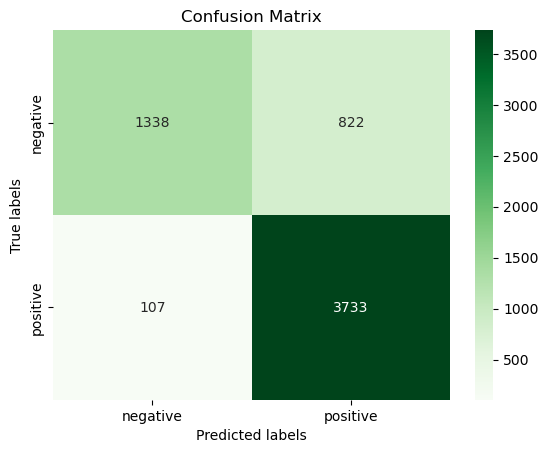

In [9]:
from sklearn.svm import SVC

# Support Vector Classifier model
svr_lin = SVC(kernel='rbf', C=1.0, gamma='scale')
svr_lin.fit(X_train_tvec, Y_train)

svr_lin_predictions = svr_lin.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,svr_lin_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
print(data_report)

# confusion matrix
svr_lin_predictions=svr_lin.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,svr_lin_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [21]:
svr_lin.predict(tvec.transform(['spending shocker cbo latest debt projection should stun even washington washington does give a fuck if they did every american would not have had over 30 trillion of printed debt shoved up their ass since 1975 and congress continues doing more']))

array([0], dtype=int64)

In [10]:
import pickle
pickle.dump(svr_lin, open('Model/election_analyser.pkl','wb'))

              precision  recall  f1-score  support
0                  0.92    0.60      0.73  2160.00
1                  0.81    0.97      0.88  3840.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.86    0.79      0.81  6000.00
weighted avg       0.85    0.84      0.83  6000.00


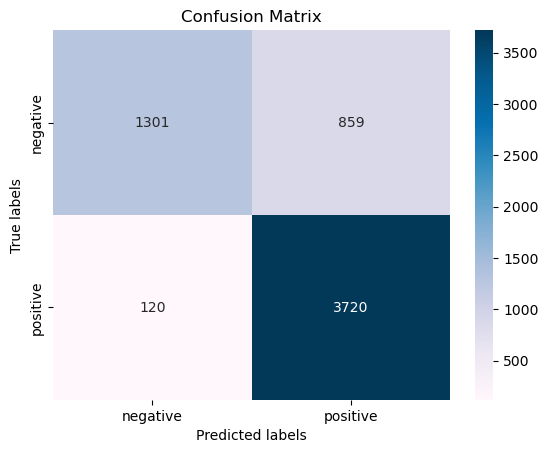

In [12]:
# Logistic regression model
lr = LogisticRegression()
lr.fit(X_train_tvec, Y_train)

# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
lr_predictions = lr.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,lr_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
print(data_report)

# confusion matrix
lr_predictions=lr.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,lr_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='PuBu');  
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [25]:
lr.predict(tvec.transform(['it is not good']))

array([1], dtype=int64)

              precision  recall  f1-score  support
0                  0.80    0.76      0.78  2160.00
1                  0.87    0.89      0.88  3840.00
accuracy           0.85    0.85      0.85     0.85
macro avg          0.84    0.83      0.83  6000.00
weighted avg       0.84    0.85      0.84  6000.00


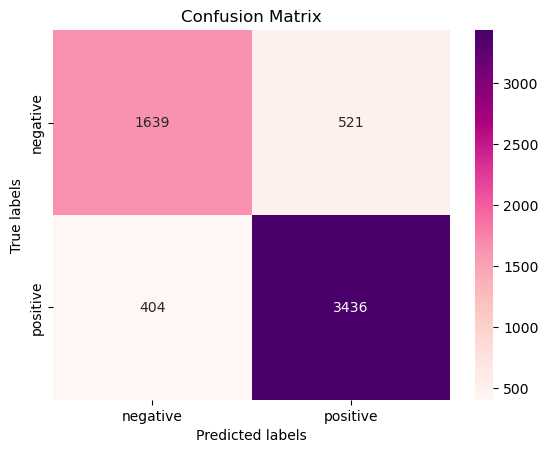

In [13]:
from sklearn.neural_network import MLPClassifier

# Artificial Neural Network Model
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)  # You can adjust the hidden_layer_sizes and max_iter as needed
ann.fit(X_train_tvec, Y_train)

# Predict using training and testing data and display the evaluation metrics
ann_predictions = ann.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test, ann_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
print(data_report)

# Confusion matrix
ann_predictions = ann.predict(tvec.transform(X_test_cleaned))
ax = plt.subplot()
cm = confusion_matrix(Y_test, ann_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='RdPu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['negative', 'positive'])
ax.yaxis.set_ticklabels(['negative', 'positive'])
plt.show()
